<p>Our capstone project is on HR attrition rates. We will be using a kaggle dataset to test our machine learning models to ensure transparency of our methodologies.</p>
<p>We will start with our data exploration and see if we can find some of the correlations between different features.</p>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Data/data.csv')
data.head()
print(data['EmployeeCount'].sum())

1470


<p>Let's first check to see if there are any missing values.</p>

In [3]:
display(data.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

<p>Fortunately, there are no missing values!</p>

<p>Note that for this model, we are looking into predicting the attrition feature. Let's start analyzing the attrition rates based on different models.</p>

In [22]:
leavers = data[data['Attrition'] == 'Yes']
nonleavers = data[data['Attrition'] == 'No']

In [14]:
nonleavers

Age Attrition     BusinessTravel  DailyRate              Department  \
1      49        No  Travel_Frequently        279  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
...   ...       ...                ...        ...                     ...   
1435   44        No      Travel_Rarely       1037  Research & Development   
1436   21        No      Travel_Rarely        501                   Sales   
1437   39        No         Non-Travel        105  Research & Development   
1439   36        No      Travel_Rarely        557                   Sales   
1440   36        No  Travel_Frequently        688  Research & Development   
1441   56        No         Non-Travel        667  Research & Development   
1443   42        No      Travel_Rarely        300  Research & Development   
1445   41        No      Travel_Rarely        582  Research & Development   
1446   34        No      Travel_Rarely        704                   Sales   
1447   36        No         Non-Travel        301                   Sales   
1448   41        No      Travel_Rarely        930                   Sales   
1449   32        No      Travel_Rarely        529  Research & Development   
1450   35        No      Travel_Rarely       1146         Human Resources   
1451   38        No      Travel_Rarely        345                   Sales   
1453   36        No      Travel_Rarely       1120                   Sales   
1454   45        No      Travel_Rarely        374                   Sales   
1455   40        No      Travel_Rarely       1322  Research & Development   
1456   35        No  Travel_Frequently       1199  Research & Development   
1457   40        No      Travel_Rarely       1194  Research & Development   
1458   35        No      Travel_Rarely        287  Research & Development   
14

In [18]:
number_leavers = leavers['EmployeeCount'].sum()
number_nonleavers = nonleavers['EmployeeCount'].sum()
print('The attrition percentage for this dataset is: ' + str(round(100*number_leavers/(number_leavers + number_nonleavers))) + "%")

The attrition percentage for this dataset is: 16.0%


<p>Now we have a basic attriton rate of 16%. To better understand whether 16% is good, we would need to find out what the industry is in. We should also take a look at how many of the high performers are leaving. We'll take a look at the distribution of leavers when ranked against the PerformanceRating column. </p>

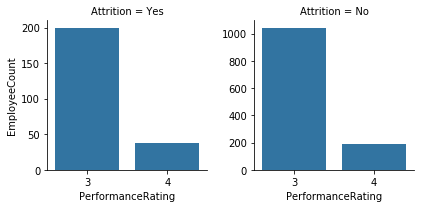

In [16]:
attrition = sns.FacetGrid(data, col="Attrition", sharey=False)
attrition.map(sns.barplot, "PerformanceRating", "EmployeeCount", estimator=sum, order=None);

<p>Generally we see that the leavers have the same distribution as the total with respect to performance ratings. Not much can be interpreted from this datapoint.</p>
<p>Let's take a look at the barplots for leavers and their RelationshipStatisfaction.</p>

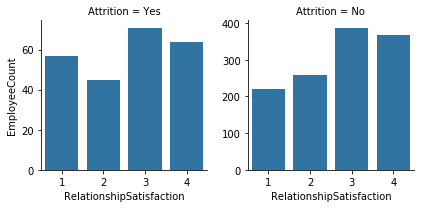

In [17]:
satisfaction = sns.FacetGrid(data, col="Attrition", sharey=False)
satisfaction.map(sns.barplot, "RelationshipSatisfaction", "EmployeeCount", estimator=sum, order=None);

<p>Again, this showed that relationship satisfaction did not have much of an impact.</p>

In [19]:
data['age_group'] = pd.cut(data.Age, bins=[g for g in range(10, 51, 5)], include_lowest=True)
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

       ...       StandardHours StockOptionLevel  TotalWorkingYears  \
0      ...                  80                0                  8   
1      ...                  80                1                 10   
2      ...                  80                0                  7   
3      ...                  80                0                  8   
4      ...                  80                1                  6   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                      0                1              6                   4   
1                      3                3             10                   7   
2                      3                3              0                   0   
3                      3                3              8                   7   
4                      3                3              2                   2   

  YearsSinceLastPromotion  YearsWithCurrManager     age_group  
0                       0                     5  (40.0, 45.0]  
1                       1                     7  (45.0, 50.0]  
2                       0                     0  (35.0, 40.0]  
3                       3                     0  (30.0, 35.0]  
4                       2                     2  (25.0, 30.0]  

[5 rows x 36 columns]

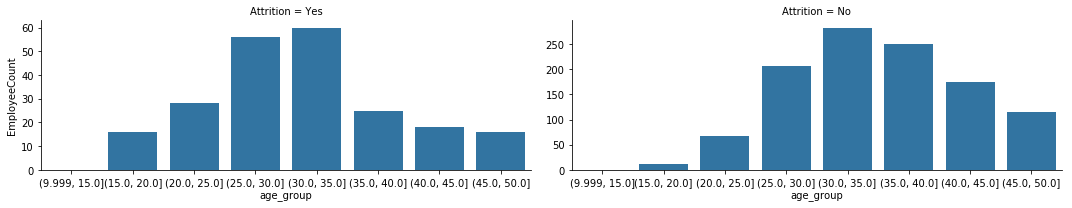

In [23]:
age_group = sns.FacetGrid(data, col="Attrition", sharey=False, aspect=2.5)
age_group.map(sns.barplot, "age_group", "EmployeeCount", estimator=sum, order=None);

<p>From this grid, we can see that generally, employees of younger age will change jobs more frequently than their older generation. This might be true given younger employees are more willing to change jobs than their older counterparts.</p>

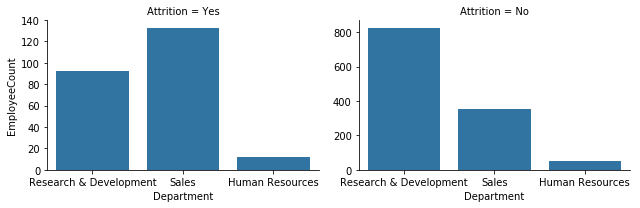

In [26]:
department = sns.FacetGrid(data, col="Attrition", sharey=False, aspect=1.5)
department.map(sns.barplot, "Department", "EmployeeCount", estimator=sum, order=None);

<p>Not suprisingly, more sales department employees are more likely to leave than research and development.</p>

<p>Now that we have done some initial analysis on the categorical variables, let's take a look at the numerical variables and see if we can find any correlations.</p>

In [28]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data_corr = data[numerical]

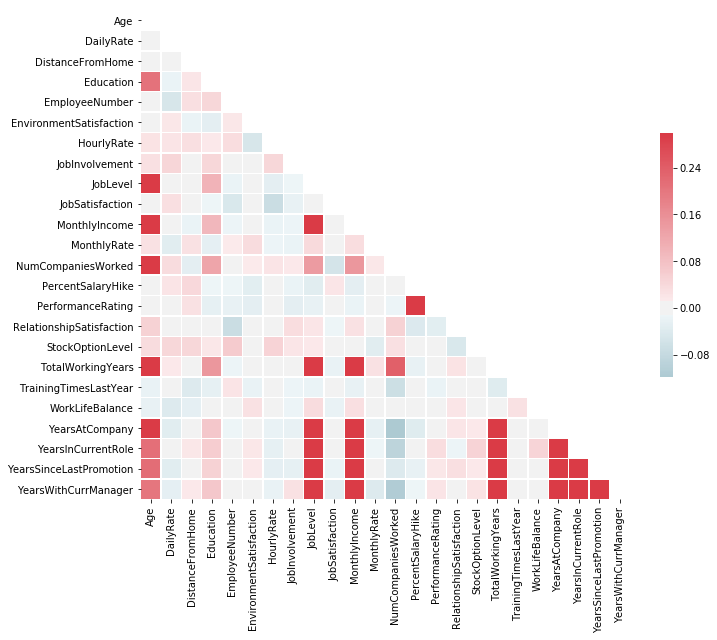

In [30]:
corr = data_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})